# 可转债信息

## 要点

* 找出那些价格在80到110元之间的可转债

* 绘制价格曲线和正股(字段名称：company_code)的对比曲线，找找规律

* 主要字段：
    id
    code
    short_name
    full_name
    list_status_id
    list_status
    issuer
    company_code
    issue_start_date
    issue_end_date
    
* 


In [73]:
import pandas as pd
from jqdatasdk import *

%matplotlib inline
print(auth('13651829783','aaronjoinquant'))

None


In [64]:
print(get_query_count())

{'total': 1000000, 'spare': 983053}


In [40]:
df=bond.run_query(query(bond.CONBOND_BASIC_INFO)) 
#.filter(bond.CONBOND_BASIC_INFO.code == '128016').limit(10)

In [57]:
# df[df['list_status']!='终止上市']
df_allinlist=df[df['list_status']!='终止上市']
series_conbond=df_allinlist['code']
# series_conbond
# df_allinlist.count()
df_allinlist.head(5)
# df[df['short_name']=='雨虹转债']

,id,code,short_name,full_name,list_status_id,list_status,issuer,company_code,issue_start_date,issue_end_date,...,bond_type,bond_form_id,bond_form,list_date,delist_Date,interest_begin_date,maturity_date,interest_date,last_cash_date,cash_comment
4,5,123035,利德转债,2019年利亚德光电股份有限公司公开发行可转换公司债券,301099,其他,利亚德光电股份有限公司,300296.XSHE,2019-11-14,2019-11-14,...,可转债,704001,记账式,None,None,2019-11-14,2025-11-14,11-14,2025-11-14,None
133,134,113008,电气转债,上海电气公开发行可转换公司债券,301001,正常上市,上海电气集团股份有限公司,601727.XSHG,2015-02-02,2015-02-02,...,可转债,704001,记账式,2015-02-16,2021-02-02,2015-02-02,2021-02-02,存续期内每年2月2日,2021-02-02,None
135,136,110031,航信转债,航天信息公开发行可转换公司债券,301001,正常上市,航天信息股份有限公司,600271.XSHG,2015-06-12,2015-06-12,...,可转债,704001,记账式,2015-06-30,2021-06-12,2015-06-12,2021-06-12,存续期内每年6月12日,2021-06-12,None
138,139,132004,15国盛EB,2015年上海国盛(集团)有限公司可交换公司债券,301001,正常上市,上海国盛(集团)有限公司,None,2015-11-05,2015-11-09,...,可交换债,704001,记账式,2015-11-25,2021-11-05,2015-11-05,2021-11-05,存续期内每年11月5日,2021-11-05,None
139,140,132005,15国资EB,2015年上海国有资产经营有限公司可交换公司债券,301001,正常上市,上海国有资产经营有限公司,None,2015-12-08,2015-12-10,...,可交换债,704001,记账式,2015-12-23,2020-12-08,2015-12-08,2020-12-08,存续期内每年12月8日,2020-12-08,None


In [79]:
# 可转债日行情，从2018-9-13开始  CONBOND_DAILY_PRICE
df_daily=bond.run_query(query(bond.CONBOND_DAILY_PRICE)\
                        .filter(bond.CONBOND_DAILY_PRICE.code == '113008')\
                        .limit(1000))

In [80]:
df_daily.head(5)
df_daily.tail(5)

,id,date,code,name,exchange_code,pre_close,open,high,low,close,volume,money,deal_number,change_pct
313,53594,2019-12-30,113008,电气转债,XSHG,114.39,113.97,114.89,113.71,114.70,93584,107065926.0,481,0.2710
314,53883,2019-12-31,113008,电气转债,XSHG,114.70,114.70,116.50,114.57,116.50,32811,37871636.0,634,1.5693
315,54262,2020-01-02,113008,电气转债,XSHG,116.50,116.97,117.20,116.31,116.35,49725,58121388.0,611,-0.1288
316,54531,2020-01-03,113008,电气转债,XSHG,116.35,116.42,116.66,115.82,116.40,31200,36279632.0,237,0.0430
317,54960,2020-01-06,113008,电气转债,XSHG,116.40,116.39,118.00,115.91,117.39,40759,47870678.0,326,0.8505


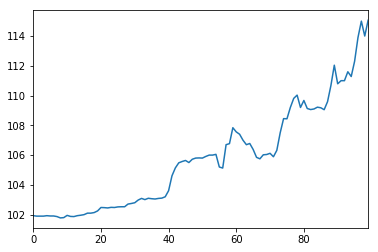

In [74]:
df['close'].plot()